# Box, box: Pit Stops in Formula 1: A Linear Regression Application

## Importing Data and the neccessary Python libraries

In [1]:
# import libraries and data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts

pit_stops = pd.read_csv('../data/pit_stops.csv', encoding="utf-8")
results = pd.read_csv('../data/results.csv', encoding="utf-8")
races = pd.read_csv('../data/races.csv', encoding="utf-8")

pit_stops.head() # view the pit stops data

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [2]:
races.head() # view the races data

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [3]:
results.head() # view the results data

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


## Cleaning Data

The datasets are prepared for analysis by renaming columns for clarity and merging to create a comprehensive dataset. Only data corresponding to finished races are retained for the analysis.

In [4]:
# rename milliseconds to pit_delta and race_time in the respecitve dataframes to avoid confusion
pit_stops.rename(columns = {'milliseconds': 'pit_delta'}, inplace = True)
results.rename(columns = {'milliseconds': 'race_time'}, inplace = True)

# merge the dataframes to have all the information in one dataframe
pit_merge = pd.merge(pit_stops, results, on=['raceId', 'driverId'], how = 'left')
pit_merge2 = pd.merge(pit_merge, races, on = ['raceId'], how = 'left')
pit_merged = pit_merge2[pit_merge2['statusId'] == 1] # filters out only finished races
pit_merged.head()

,raceId,driverId,stop,lap,time_x,duration,pit_delta,resultId,constructorId,number,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
2,841,17,1,11,17:20:48,23.426,23426,20783,9,2,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,841,4,1,12,17:22:34,23.251,23251,20782,6,5,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,841,13,1,13,17:24:10,23.842,23842,20785,6,6,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
6,841,20,1,14,17:25:17,22.603,22603,20779,9,1,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
11,841,1,1,16,17:28:24,23.227,23227,20780,1,3,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [5]:
# Print all the column names in merged DataFrame
print(pit_merged.columns)

Index(['raceId', 'driverId', 'stop', 'lap', 'time_x', 'duration', 'pit_delta',
       'resultId', 'constructorId', 'number', 'grid', 'position',
       'positionText', 'positionOrder', 'points', 'laps', 'time_y',
       'race_time', 'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed',
       'statusId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time'],
      dtype='object')


In [6]:
# retain only the columns needed 
selected_columns = ['raceId', 'year', 'driverId', 'stop', 'pit_delta', 'race_time']
my_pit = pit_merged[selected_columns]

my_pit = my_pit.copy() # make copy to modify without issues

my_pit.rename(columns = {'stop': 'number_of_stops' }, inplace = True) 
my_pit.head()

,raceId,year,driverId,number_of_stops,pit_delta,race_time
2,841,2011,17,1,23426,5408430
3,841,2011,4,1,23251,5402031
4,841,2011,13,1,23842,5455445
6,841,2011,20,1,22603,5370259
11,841,2011,1,1,23227,5392556


### Data Transformation and Aggregation

Data is further cleaned and transformed. Total pit stop times and the number of stops are aggregated for each driver in each race. The dataset is de-duplicated and missing values are removed.

In [7]:
# Group by race and driver and compute total stops
total_stops = my_pit.groupby(['raceId', 'driverId'])['number_of_stops'].transform('max')

# Update the 'number of stops' column
my_pit['number_of_stops'] = total_stops

# Sum all pit stop times to find total time spent on pit stops(pit_delta) per race per driver
total_pit_delta = my_pit.groupby(['raceId', 'driverId'])['pit_delta'].transform('sum')

# Update the 'pit_time' column
my_pit['pit_delta'] = total_pit_delta

my_pit.head()

,raceId,year,driverId,number_of_stops,pit_delta,race_time
2,841,2011,17,3,72176,5408430
3,841,2011,4,3,72165,5402031
4,841,2011,13,3,72437,5455445
6,841,2011,20,2,46639,5370259
11,841,2011,1,2,46426,5392556


In [8]:
# Since we have a sum, drop duplicates 
my_pit = my_pit.drop_duplicates(subset=['raceId', 'driverId'])

my_pit.head()

,raceId,year,driverId,number_of_stops,pit_delta,race_time
2,841,2011,17,3,72176,5408430
3,841,2011,4,3,72165,5402031
4,841,2011,13,3,72437,5455445
6,841,2011,20,2,46639,5370259
11,841,2011,1,2,46426,5392556


In [9]:
# change the time to an integer 
print(my_pit['race_time'].dtype)
my_pit['race_time'] = my_pit['race_time'].astype(int)
print(my_pit['race_time'].dtype)

object
int64


In [10]:
# remove missing values
my_pit.replace('\\N', np.nan, inplace=True)
my_pit.dropna(inplace=True)

In [11]:
# look at summary statistics
my_pit.describe()

,raceId,year,driverId,number_of_stops,pit_delta,race_time
count,2716.000000,2716.000000,2716.000000,2716.000000,2.716000e+03,2.716000e+03
mean,978.799705,2017.081001,495.038660,2.095361,2.108887e+05,6.006711e+06
std,83.515623,3.879881,398.832086,1.011226,5.921640e+05,1.204546e+06
min,841.000000,2011.000000,1.000000,1.000000,1.743400e+04,4.421143e+06
25%,898.000000,2013.000000,13.000000,1.000000,2.937675e+04,5.376162e+06
50%,980.000000,2017.000000,815.000000,2.000000,4.700550e+04,5.726464e+06
75%,1053.000000,2021.000000,830.000000,3.000000,6.702050e+04,6.169959e+06
max,1115.000000,2023.000000,859.000000,7.000000,3.703013e+06,1.474314e+07


In [12]:
# convert race_time and pit delta to minutes 
my_pit['race_time'] = my_pit['race_time'] / 60000
my_pit['pit_delta'] = my_pit['pit_delta'] / 60000

# Remove Outliers (Only using 90% of the data that falls withing reasonable pit and race times)
p_quantile_91 = my_pit['pit_delta'].quantile(0.90)
r_quantile_91 = my_pit['race_time'].quantile(0.90)
my_data = my_pit[(my_pit['pit_delta'] < p_quantile_91) & (my_pit['race_time'] < r_quantile_91)]

In [13]:
my_data.head()

,raceId,year,driverId,number_of_stops,pit_delta,race_time
2,841,2011,17,3,1.202933,90.140500
3,841,2011,4,3,1.202750,90.033850
4,841,2011,13,3,1.207283,90.924083
6,841,2011,20,2,0.777317,89.504317
11,841,2011,1,2,0.773767,89.875933


## Race Time and Pit Delta
### Visualizing the Data

Histograms are plotted for both pit delta and race times to visualize their distributions. A scatter plot is then used to examine the relationship between race time and pit delta, followed by performing a linear regression to model this relationship.

In [14]:
# function to plot histograms 
def plot_hist(dataframe, column):
    """
    Plots a histogram for a specified column in a pandas DataFrame, including mean and quantiles.

    This function takes a DataFrame and a column name as inputs. It generates a histogram
    for the data in the specified column, overlaying vertical lines to indicate the mean,
    25th, 50th (median), and 75th quantiles. The histogram provides a visual representation
    of the distribution of the data, highlighting central tendency and variability.

    Parameters:
    - dataframe (pandas.DataFrame): The DataFrame containing the data to plot.
    - column (str): The name of the column in the DataFrame for which to plot the histogram.

    The histogram is plotted with 50 bins and includes dashed lines for the mean and
    quantiles in different colors for easy identification. The plot includes a title
    indicating the column being visualized, labels for both axes, and a legend.

    Returns:
    None: The function directly displays the histogram plot and does not return any value.
    """

    plt.figure(figsize = (10, 8))
    plt.hist(dataframe[column], 
             bins = 50, 
             edgecolor = 'black', 
             alpha = 0.7)

    # Adding mean and quantiles
    mean_val = dataframe[column].mean()
    q_25 = dataframe[column].quantile(0.25)
    q_50 = dataframe[column].quantile(0.50)
    q_75 = dataframe[column].quantile(0.75)

    plt.axvline(mean_val, color='red', linestyle='dashed', 
                linewidth=1, label=f"Mean: {mean_val:.2f}")
    plt.axvline(q_25, color='blue', linestyle='dashed', 
                linewidth=1, label=f"25th quantile: {q_25:.2f}")
    plt.axvline(q_50, color='green', linestyle='dashed', 
                linewidth=1, label=f"50th quantile (median): {q_50:.2f}")
    plt.axvline(q_75, color='yellow', linestyle='dashed', 
                linewidth=1, label=f"75th quantile: {q_75:.2f}")

    plt.title(f'Histogram for {column}', fontsize = 20)
    plt.xlabel(f"{column}", fontsize = 14)
    plt.ylabel('Frequency', fontsize = 14)
    plt.legend()
    plt.show()

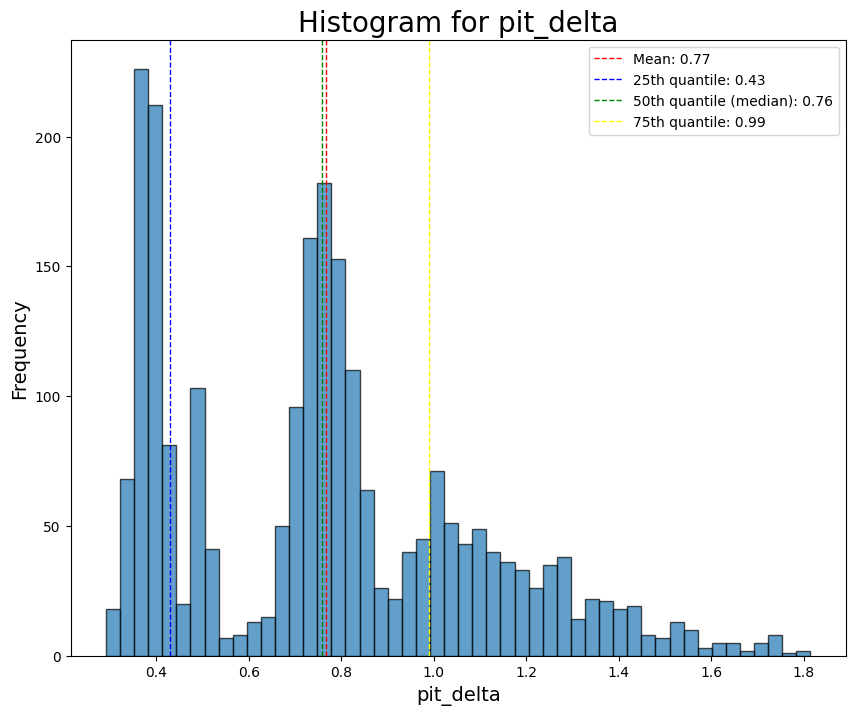

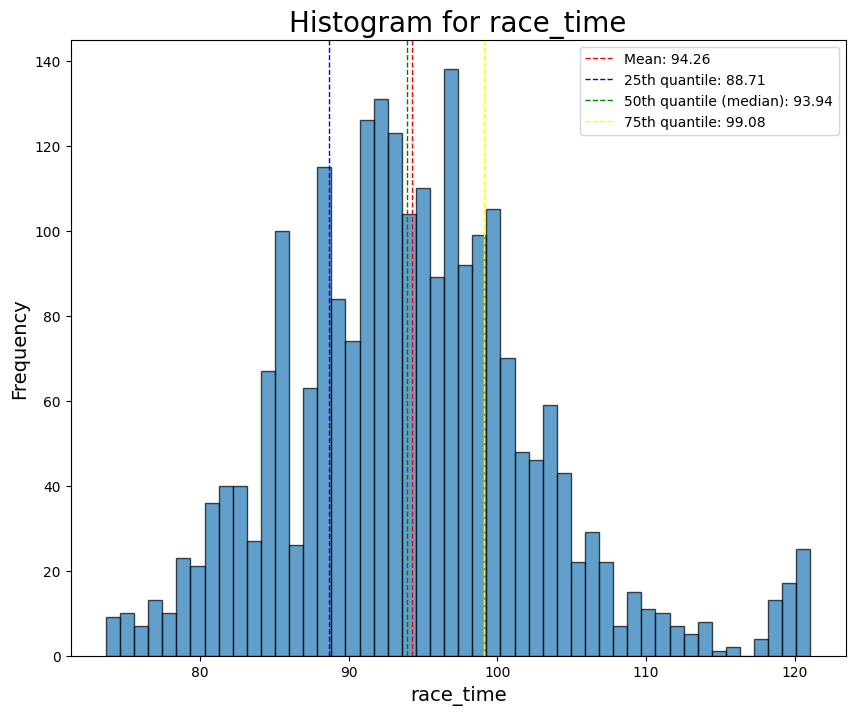

In [15]:
# histograms for the dataset 
plot_hist(my_data, 'pit_delta')
plot_hist(my_data, 'race_time')

## Number of Pit Stops and Pit Delta

The relationship between the number of pit stops and the total time spent in pits (Pit Delta) is examined. The dataset is sorted by the number of pit stops, and visualizations are generated to explore this relationship further.


### Scatter plot showing Race Time vs Pit Delta

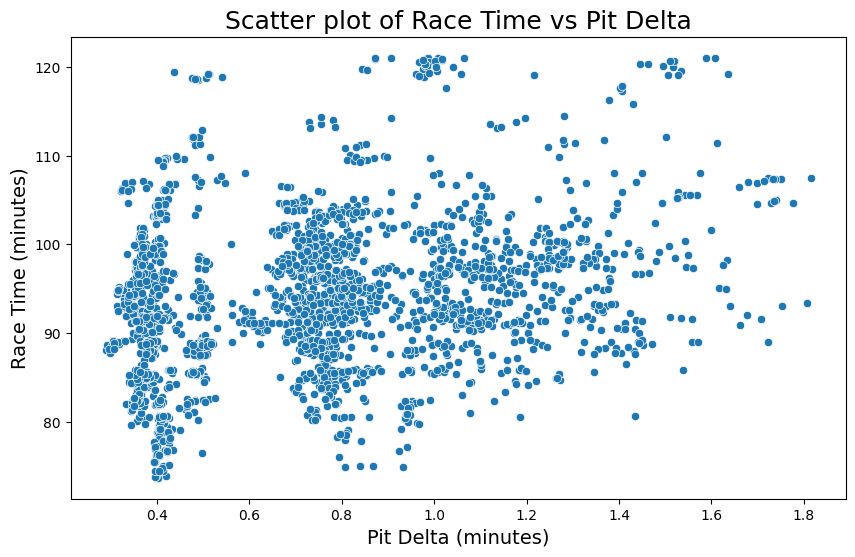

In [16]:
# Scatter plot for race time vs pit delta
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pit_delta', y='race_time', data=my_data)
plt.title('Scatter plot of Race Time vs Pit Delta', fontsize = 18)
plt.xlabel('Pit Delta (minutes)', fontsize = 14)
plt.ylabel('Race Time (minutes)', fontsize = 14)
plt.show()

### Linear Regression Analysis

This section performs a linear regression analysis to understand the relationship between pit delta time and race time. It calculates the slope, intercept, correlation coefficient, p-value, and standard error of the regression, then uses these parameters to predict race times based on pit delta times.

In [17]:
pit_delta = my_data['pit_delta']
race_time = my_data['race_time']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = sts.linregress(pit_delta, race_time)

# Generate y-values for the line of best fit on the original data
predicted_race_time = slope * pit_delta + intercept

#### Visualizing Line of Best Fit

After calculating the linear regression, this section plots the original scatterplot of race time against pit delta alongside the line of best fit. This visualization helps to intuitively understand the correlation between pit stop duration and overall race performance.

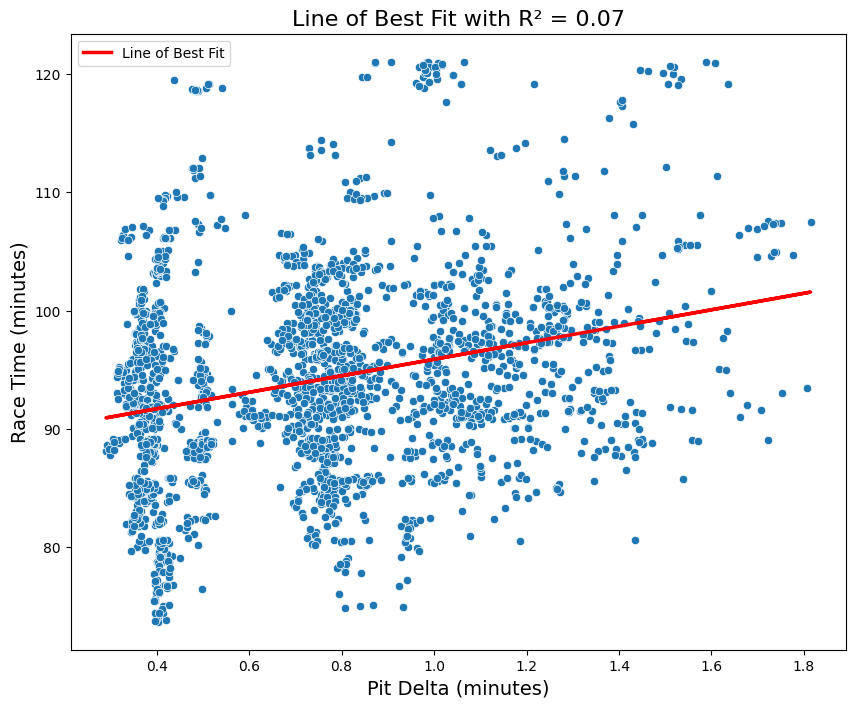

In [18]:
# Plotting
plt.figure(figsize=(10,8))
sns.scatterplot(x='pit_delta', y='race_time', data=my_data)
plt.plot(pit_delta, predicted_race_time, color='red', label='Line of Best Fit', linewidth=2.5)

# Adding labels, legend, and title
plt.title(f'Line of Best Fit with R² = {r_value**2:.2f}', fontsize = 16)
plt.xlabel('Pit Delta (minutes)', fontsize = 14)
plt.ylabel('Race Time (minutes)', fontsize = 14)
plt.legend()

plt.show()

## Analysis of Number of Pit Stops and Pit Delta

Exploring further, this section investigates the relationship between the number of pit stops and the total time spent in pit stops (Pit Delta). The analysis sorts the data by the number of pit stops and visualizes the distribution and correlation of these variables.

In [19]:
# Sort number of pit stops
my_data2 = my_data.sort_values(by='number_of_stops', ascending=True)

### Visualizing the Data

Histograms and scatter plots are generated to examine the distribution of the number of pit stops and to explore its relationship with pit delta times. This visualization provides insights into how pit strategies may affect race outcomes.

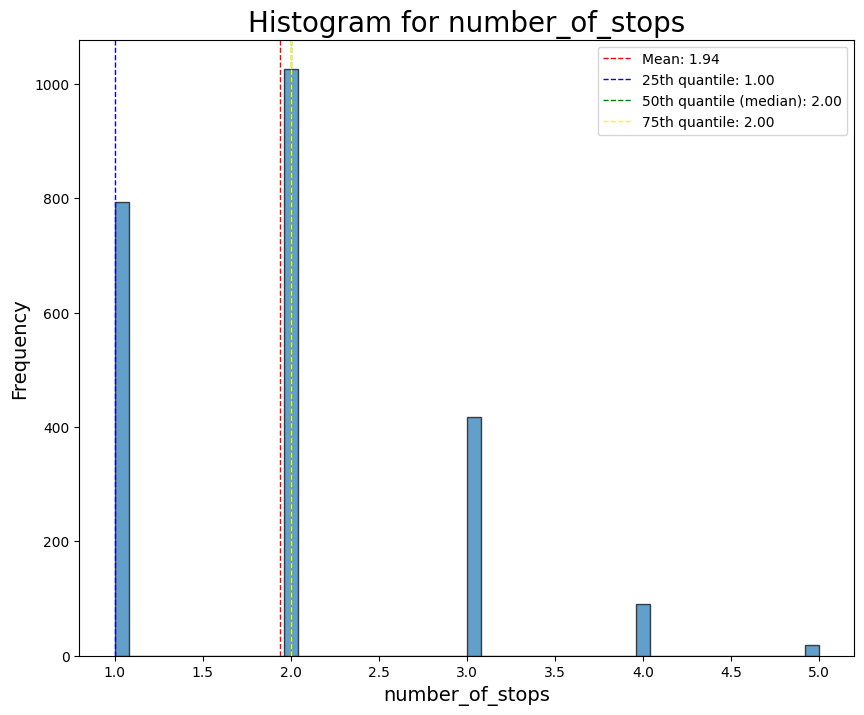

In [20]:
plot_hist(my_data, 'number_of_stops')


#### Scatter Plot

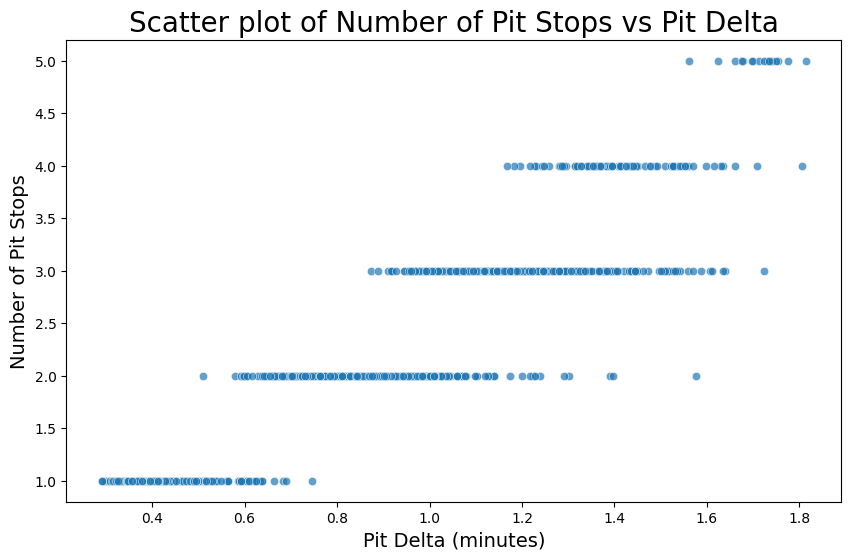

In [21]:
# Scatter plot
plt.figure(figsize = (10, 6))
sns.scatterplot(x='pit_delta', y='number_of_stops', data=my_data2, alpha=0.7)
plt.title('Scatter plot of Number of Pit Stops vs Pit Delta', fontsize = 20)
plt.xlabel('Pit Delta (minutes)', fontsize = 14)
plt.ylabel('Number of Pit Stops', fontsize = 14)
plt.show()

#### Jitter Plot

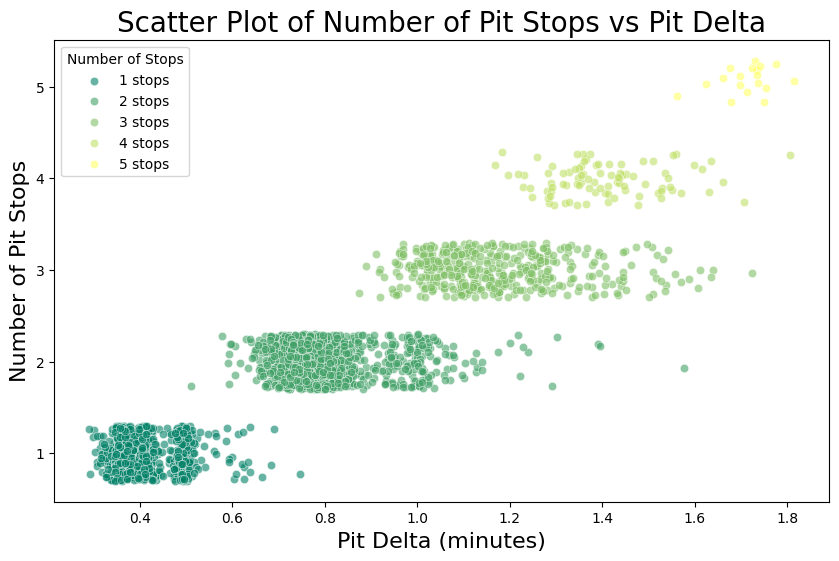

In [22]:
# Adding jitter: modify the 'number_of_stops' by adding a small random noise
jitter = 0.3

# Convert 'number_of_stops' to numeric type before adding jitter
jitter_no_stops = my_data2['number_of_stops'].astype(float) + np.random.uniform(-jitter, jitter, size=len(my_data2))

# Generate a colormap based on the number of unique 'number_of_stops'
unique_stops = my_data2['number_of_stops'].unique()
colors = plt.cm.summer(np.linspace(0, 1, len(unique_stops)))

plt.figure(figsize=(10, 6))

# Create a scatter plot for each group with different colors
for i, stop in enumerate(sorted(unique_stops)):  
    mask = my_data2['number_of_stops'] == stop
    sns.scatterplot(x=my_data2['pit_delta'][mask], y=jitter_no_stops[mask], alpha=0.6, color=colors[i], label=f'{stop} stops')

plt.title('Scatter Plot of Number of Pit Stops vs Pit Delta', fontsize = 20)
plt.xlabel('Pit Delta (minutes)', fontsize = 16)
plt.ylabel('Number of Pit Stops', fontsize = 16)

plt.legend(title="Number of Stops", loc='upper left') 
plt.show()

### Linear Regression on Number of Pit Stops and Pit Delta

Conducting a linear regression analysis to assess how the total time spent on pit stops (Pit Delta) correlates with the number of pit stops. This analysis aims to reveal whether there is a significant linear relationship between these two variables.

In [23]:
# Calculating the line of best fit
# Convert 'number_of_stops' into a numeric format that fits with linregress
stops_numeric = np.array(my_data2['number_of_stops'].apply(lambda x: float(x))) 
pit_delta = my_data2['pit_delta'].values  

slope, intercept, r_value, p_value, std_err = sts.linregress(pit_delta, stops_numeric)  

# Generating values for the line of best fit
pit_deltas = np.linspace(np.min(pit_delta), np.max(pit_delta), 100)  # Generating x values for plotting the line
stops_pred = intercept + slope * pit_deltas  # Corresponding y values for the line


#### Visualizing Line of Best Fit

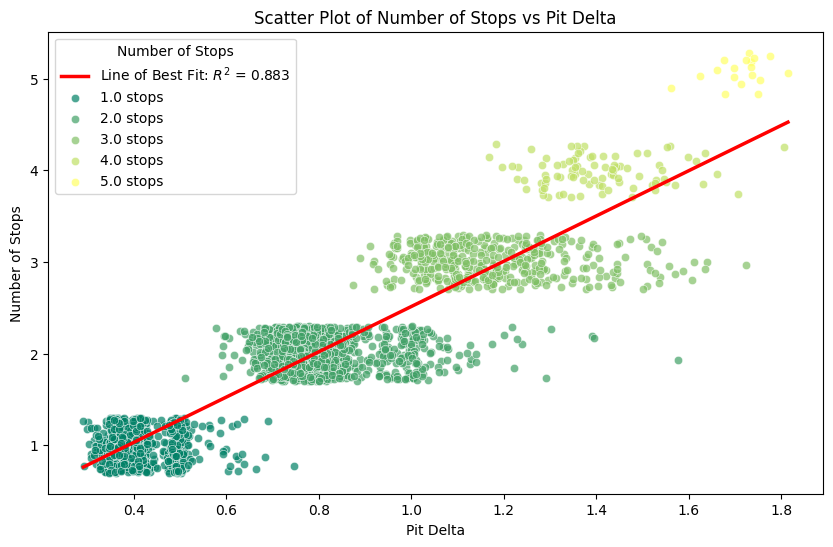

In [24]:
# Plotting the line of best fit and scatterplot
plt.figure(figsize=(10, 6))
plt.plot(pit_deltas, stops_pred, color="red", linewidth=2.5,
         label=f'Line of Best Fit: $R^2$ = {r_value**2:.3f}')

for i, stop in enumerate(sorted(np.unique(stops_numeric))):  
    mask = stops_numeric == stop
    sns.scatterplot(x=pit_delta[mask], y=jitter_no_stops[mask], alpha=0.7, color=colors[i], label=f'{stop} stops')
    
plt.title('Scatter Plot of Number of Stops vs Pit Delta')
plt.xlabel('Pit Delta')
plt.ylabel('Number of Stops')

plt.legend(title="Number of Stops", loc='upper left')

plt.show()

**Exporting the dataframe for use in another analysis**

In [25]:
# Save the DataFrame to a CSV file for use in other notebooks
my_data2.to_csv('../data/pitstops_modified.csv', index=False)  